In [17]:
#importing libraries

import pandas as pd 
import numpy as np 
import requests 
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.graph_objs as go
import datetime
from pandas_profiling import ProfileReport

In [18]:
#reading excel file
df = pd.read_excel("Data Visualization Assignmnet.xlsx")

In [19]:
df.head()

,DATE,DESCRIPTION,UNIT,PLACE
0,2022-04-01,Beef,1,Kolenchery
1,2022-04-01,Fish,1,Kolenchery
2,2022-04-03,Beef,2,Tripunithura
3,2022-04-05,Prawns,1,Bangalore
4,2022-04-06,Dates,1,Mangalore


In [20]:
# Getting initial description about our dataset
df.describe()

,UNIT
count,111.000000
mean,1.720721
std,1.088545
min,1.000000
25%,1.000000
50%,1.000000
75%,2.000000
max,6.000000


In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111 entries, 0 to 110
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   DATE         111 non-null    datetime64[ns]
 1   DESCRIPTION  111 non-null    object        
 2   UNIT         111 non-null    int64         
 3   PLACE        103 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(2)
memory usage: 3.6+ KB


In [22]:
# Checking if is there any null values in our data 
df.isnull().sum()

DATE           0
DESCRIPTION    0
UNIT           0
PLACE          8
dtype: int64

In [23]:
# Since we have some blank values in Places column , we will fill it with place with most frequency , i.e Malappuram
df.fillna("Malappuram")


,DATE,DESCRIPTION,UNIT,PLACE
0,2022-04-01,Beef,1,Kolenchery
1,2022-04-01,Fish,1,Kolenchery
2,2022-04-03,Beef,2,Tripunithura
3,2022-04-05,Prawns,1,Bangalore
4,2022-04-06,Dates,1,Mangalore
...,...,...,...,...
106,2022-07-05,Lemon,4,Malappuram
107,2022-07-08,Beef,1,Malappuram
108,2022-07-15,Beef,1,Malappuram
109,2022-07-15,Prawns,1,Malappuram


In [24]:
df.DESCRIPTION.replace("Dryfruits", "Dry fruits",inplace=True)

In [25]:
df.DESCRIPTION.unique()

array(['Beef', 'Fish', 'Prawns', 'Dates', 'Mango', 'Lemon', 'Dry fruits',
       'King Fish', 'Kadumanga'], dtype=object)

# Now we will perform some visualizations on our data

# Pie Chart for Top 10 Products Sold

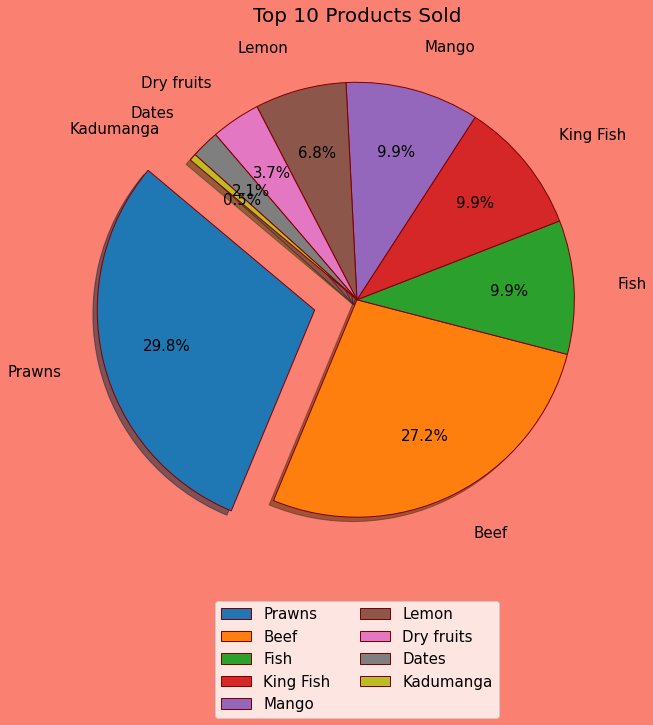

In [28]:

Labels = df.groupby('DESCRIPTION')["UNIT"].sum().sort_values(ascending=False).index
values = df.groupby('DESCRIPTION')["UNIT"].sum().sort_values(ascending=False).values
import matplotlib.pyplot as plt

# Data to plot

Colors = df["DESCRIPTION"]

Explode = (0.2, 0, 0, 0, 0, 0, 0,0,0)
textprops = {"fontsize":15}
# Plot

plt.figure(facecolor='salmon',figsize=(10,10))
x=plt.pie(values,labels=Labels,autopct='%1.1f%%', shadow=True, startangle=140,pctdistance=.7, wedgeprops=
       {'edgecolor':'maroon'},explode=Explode,textprops=textprops,
        labeldistance=1.2)
plt.title('Top 10 Products Sold',fontsize=20)
plt.legend(labels=Labels, loc='upper center', 
           bbox_to_anchor=(0.5, -0.04), ncol=2,fontsize=15)
plt.show()

In [29]:
 df.groupby('DESCRIPTION')["UNIT"].sum().sort_values(ascending=False).index

Index(['Prawns', 'Beef', 'Fish', 'King Fish', 'Mango', 'Lemon', 'Dry fruits',
       'Dates', 'Kadumanga'],
      dtype='object', name='DESCRIPTION')

### As we can see that  PRAWNS is the most popular item with 28.8 % in total orders while it is closely followed byBEEF with 27.9% in total orders

# Which are the top 10 places having max sales

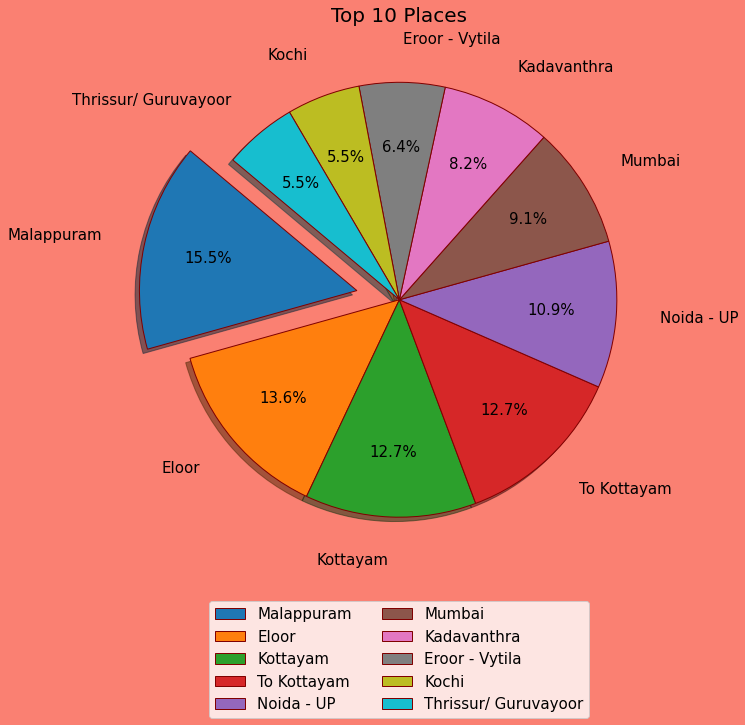

In [30]:
Labels = df.groupby('PLACE')["UNIT"].sum().sort_values(ascending=False).index[0:10]
values = df.groupby('PLACE')["UNIT"].sum().sort_values(ascending=False).values[0:10]


# Data to plot

Colors = df["PLACE"]

Explode = (0.2, 0, 0, 0, 0, 0, 0,0,0,0)
textprops = {"fontsize":15}
# Plot

plt.figure(facecolor='salmon',figsize=(10,10))
x=plt.pie(values,labels=Labels,autopct='%1.1f%%', shadow=True, startangle=140,pctdistance=.7, wedgeprops=
       {'edgecolor':'maroon'},explode=Explode,textprops=textprops,
        labeldistance=1.2)
plt.title('Top 10 Places',fontsize=20)
plt.legend(labels=Labels, loc='upper center', 
           bbox_to_anchor=(0.5, -0.04), ncol=2,fontsize=15)
plt.show()

### As we can see that Malappuram has the highest number of orders with 15.5% in total orders 

# Which products sold least ?

<BarContainer object of 5 artists>

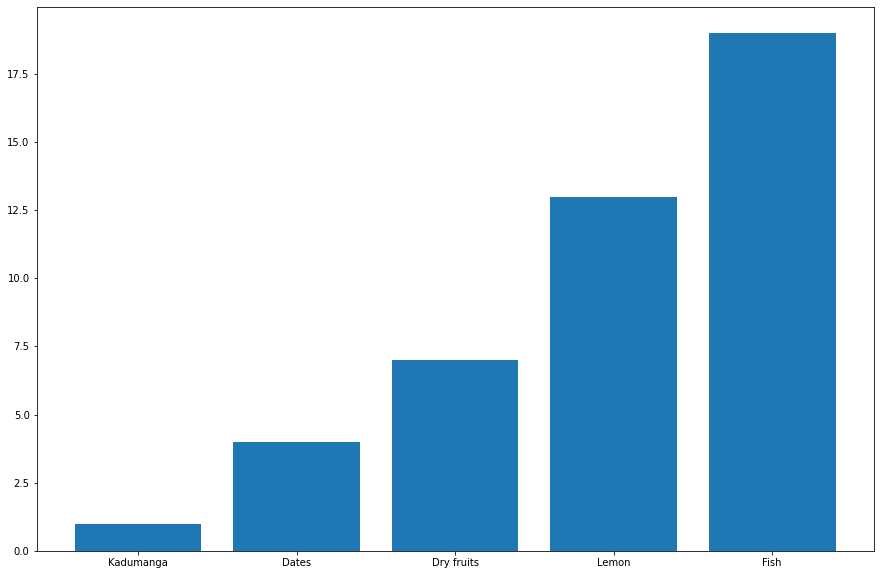

In [31]:
Least_5 = df.groupby("DESCRIPTION")["UNIT"].sum().sort_values(ascending=True).index[0:5]
Val = df.groupby("DESCRIPTION")["UNIT"].sum().sort_values(ascending=True).values[0:5]
plt.figure(figsize=(15,10))
plt.bar(Least_5,height=Val,)


### As we can see that  Kadumanga is the least sold product among all the products followed by other least sold products 

# Which month has most sales ?

In [32]:
Month=df.DATE.dt.month
Year =df.DATE.dt.year
Day = df.DATE.dt.day

In [33]:
df['Month']=Month
df['Year']=Year
df['Day'] = Day

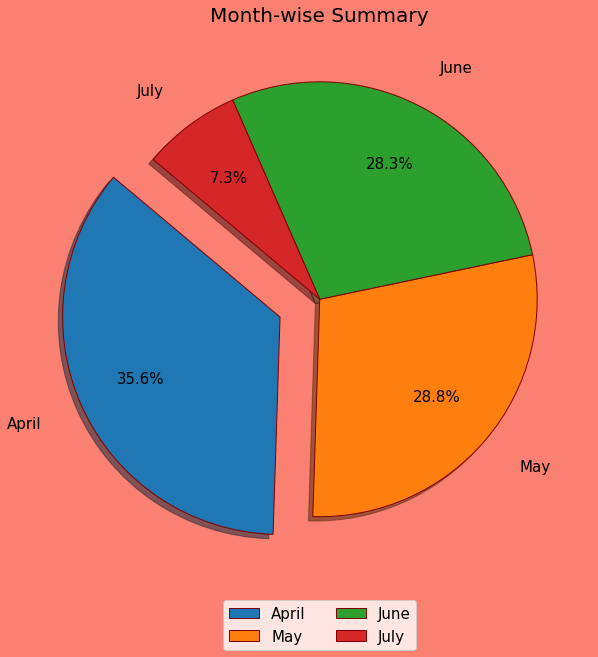

In [34]:
values = df.groupby('Month')["UNIT"].sum().sort_values(ascending=False).values[0:10]
Labels=["April" , "May","June","July"]



# Data to plot

Colors = df["PLACE"]

Explode = (0.2, 0, 0, 0)
textprops = {"fontsize":15}
# Plot

plt.figure(facecolor='salmon',figsize=(10,10))
x=plt.pie(values,labels=Labels,autopct='%1.1f%%', shadow=True, startangle=140,pctdistance=.7, wedgeprops=
       {'edgecolor':'maroon'},explode=Explode,textprops=textprops,
        labeldistance=1.2)
plt.title('Month-wise Summary',fontsize=20)
plt.legend(labels=Labels, loc='upper center', 
           bbox_to_anchor=(0.5, -0.04), ncol=2,fontsize=15)
plt.show()

### It is clearly visible that the april month has most number of orders with 35.6% of total orders


#  Some more visualizations 

<AxesSubplot:xlabel='Month'>

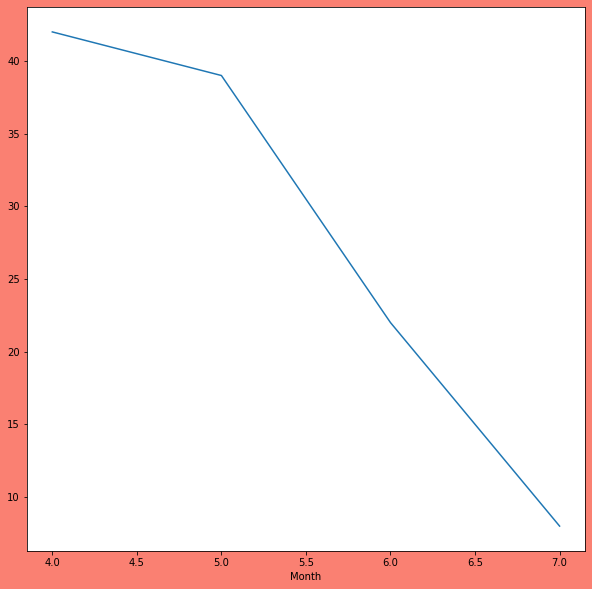

In [43]:
plt.figure(facecolor='salmon',figsize=(10,10))
df.groupby(['Month' ])['Day'].count().plot()

In [36]:
df.groupby(['Month' ])['Day'].count()

Month
4    42
5    39
6    22
7     8
Name: Day, dtype: int64

## As we can see that as the month increases sales decreases from April to July

In [37]:
df2 =df.copy()


<AxesSubplot:xlabel='DESCRIPTION'>

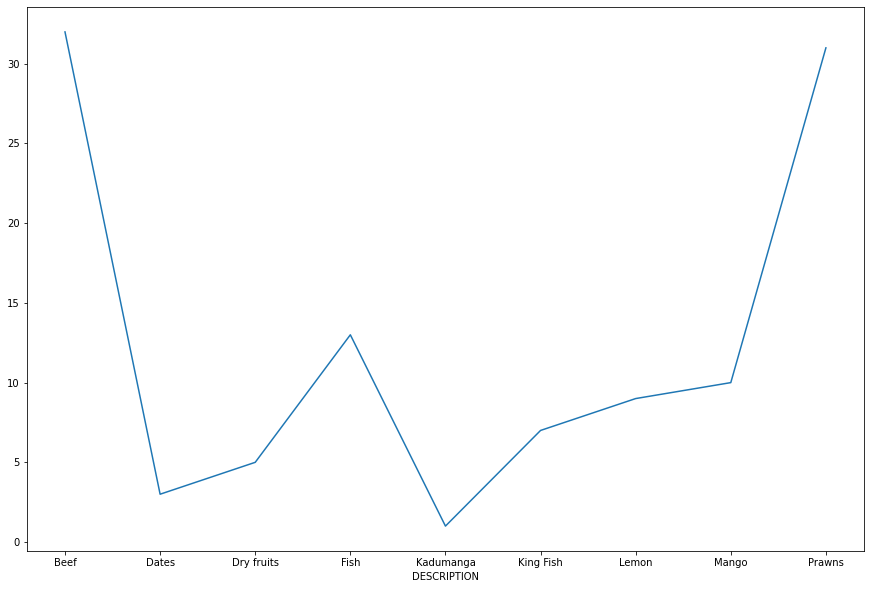

In [38]:
df2.set_index('DATE', inplace=True)
plt.figure(figsize=(15,10))
df2.groupby('DESCRIPTION')['UNIT'].count().plot()

In [39]:
df.groupby('Month')["UNIT"].sum().sort_values(ascending=False).values

array([68, 55, 54, 14], dtype=int64)

<BarContainer object of 5 artists>

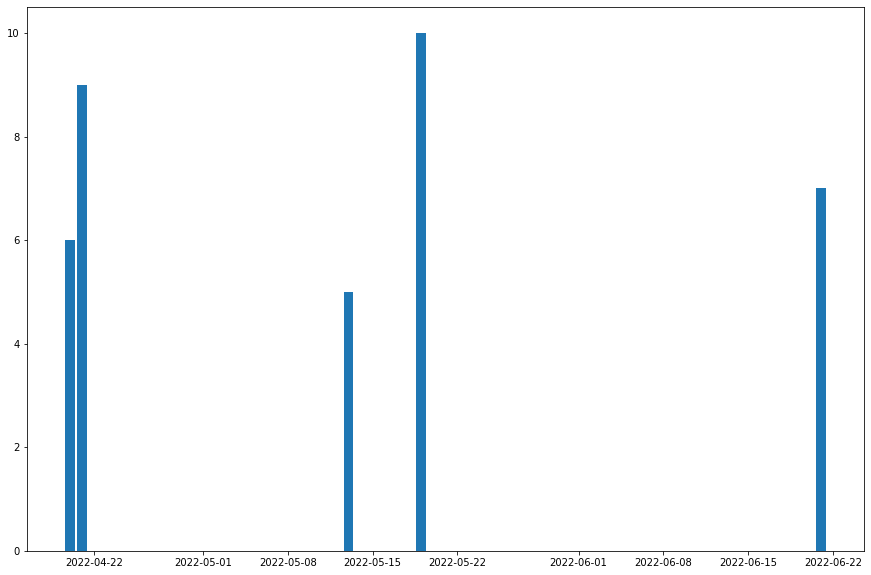

In [40]:

plt.figure(figsize=(15,10))
Labels = df.DATE.value_counts()[:5].index
Values = df.DATE.value_counts()[:5].values
plt.bar(x=Labels,height=Values)

In [41]:
profile = ProfileReport(df)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

<AxesSubplot:>

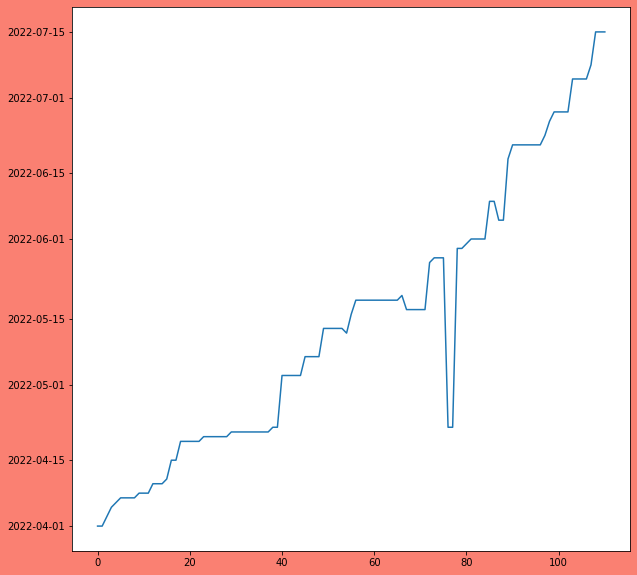

In [42]:

plt.figure(facecolor='salmon',figsize=(10,10))
df.DATE.plot()